<a href="https://colab.research.google.com/github/tapiwamesa/LSTM-ZSE-Price-Prediction-/blob/main/Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Collection



In [ ]:
#Importing the important libraries for this chapter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from PIL import Image

In [ ]:
# Mount Google Drive (the file is stored in Google Drive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the CSV file
stock_file_path = '/content/drive/MyDrive/Colab Notebooks/Conso_Data.csv'

In [ ]:
#Reading the ZSE Data, thus the top 10 performing counters
zse = pd.read_csv(stock_file_path)

In [ ]:
#Viewing the first 5 rows of our data
zse.head()

DATE    BAT   CBZ  DAIRIBORD  DELTA  ECONET  LAFARGE  NATFOODS    OK  \
0  1/2/2020  47.75  0.70       0.43   3.41    1.49      1.8      9.01  0.55   
1  1/3/2020  47.75  0.70       0.43   3.46    1.50      1.8      9.01  0.61   
2  1/6/2020  47.75  0.69       0.43   3.46    1.50      1.8      9.01  0.62   
3  1/7/2020  47.75  0.69       0.43   3.46    1.50      1.8      9.00  0.65   
4  1/8/2020  47.75  0.69       0.43   3.46    1.50      1.8      9.00  0.65   

   SEEDCO  SIMBISA  
0    1.60     1.26  
1    1.61     1.26  
2    1.61     1.26  
3    1.61     1.26  
4    1.50     1.26

In [ ]:
#making a copy of our data to avoid losing the data during cleaning
zse_copy = zse.copy()

## Data Cleaning

In [ ]:
#Trimming our data to only analyze top 4 counters

zse = zse[['DATE', 'DELTA', 'SEEDCO', 'SIMBISA', 'NATFOODS']]

In [ ]:
#Viewing our data
zse.head()

DATE  DELTA  SEEDCO  SIMBISA  NATFOODS
0  1/2/2020   3.41    1.60     1.26      9.01
1  1/3/2020   3.46    1.61     1.26      9.01
2  1/6/2020   3.46    1.61     1.26      9.01
3  1/7/2020   3.46    1.61     1.26      9.00
4  1/8/2020   3.46    1.50     1.26      9.00

In [ ]:
#Setting our date as index for our data
zse.set_index('DATE',inplace = True)
zse.head()

DELTA  SEEDCO  SIMBISA  NATFOODS
DATE                                      
1/2/2020   3.41    1.60     1.26      9.01
1/3/2020   3.46    1.61     1.26      9.01
1/6/2020   3.46    1.61     1.26      9.01
1/7/2020   3.46    1.61     1.26      9.00
1/8/2020   3.46    1.50     1.26      9.00

In [ ]:
#Checking the datatype of our columns as well as index
type(zse.index)

pandas.core.indexes.base.Index

In [ ]:
zse.info()

<class 'pandas.core.frame.DataFrame'>
Index: 726 entries, 1/2/2020 to 12/30/2022
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DELTA     726 non-null    float64
 1   SEEDCO    673 non-null    float64
 2   SIMBISA   703 non-null    float64
 3   NATFOODS  717 non-null    float64
dtypes: float64(4)
memory usage: 28.4+ KB


In [ ]:
#Converting our index to datetime format

zse.index = pd.to_datetime(zse.index, format='%m/%d/%Y')
zse.head()

DELTA  SEEDCO  SIMBISA  NATFOODS
DATE                                        
2020-01-02   3.41    1.60     1.26      9.01
2020-01-03   3.46    1.61     1.26      9.01
2020-01-06   3.46    1.61     1.26      9.01
2020-01-07   3.46    1.61     1.26      9.00
2020-01-08   3.46    1.50     1.26      9.00

In [ ]:
#checking if our transformation has been effected
type(zse.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
#Checking information for the columns which are the stocks
zse.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 726 entries, 2020-01-02 to 2022-12-30
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DELTA     726 non-null    float64
 1   SEEDCO    673 non-null    float64
 2   SIMBISA   703 non-null    float64
 3   NATFOODS  717 non-null    float64
dtypes: float64(4)
memory usage: 28.4 KB


### *Our data points are 726 entries thus daily prices for 2020, 2021 and 2022*

### *Comments:*



    
    

In [ ]:
#Checking for missing values
zse.isnull().sum()

DELTA        0
SEEDCO      53
SIMBISA     23
NATFOODS     9
dtype: int64

##### NATFOODS missing prices by year

In [ ]:
#Dates of NATFOODS missing prices

zse.index[zse['NATFOODS'].isnull()]

DatetimeIndex(['2022-12-15', '2022-12-16', '2022-12-19', '2022-12-20',
               '2022-12-21', '2022-12-23', '2022-12-28', '2022-12-29',
               '2022-12-30'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [ ]:
#Missing values by year

nat = zse['NATFOODS']
nat.isnull().groupby(nat.index.year).sum()

DATE
2020    0
2021    0
2022    9
Name: NATFOODS, dtype: int64

##### SEEDCO missing prices by year

In [ ]:
#Dates of SEEDCO missing prices

zse.index[zse['SEEDCO'].isnull()]

DatetimeIndex(['2021-04-01', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-12', '2021-04-13', '2021-04-14',
               '2021-04-15', '2021-04-16', '2021-04-20', '2021-04-21',
               '2021-04-22', '2021-04-23', '2021-04-26', '2021-04-27',
               '2021-04-28', '2021-04-29', '2021-04-30', '2021-05-03',
               '2021-05-04', '2021-05-05', '2021-05-06', '2021-05-07',
               '2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13',
               '2021-05-14', '2021-05-17', '2021-05-18', '2021-05-19',
               '2021-05-20', '2021-05-21', '2021-05-24', '2021-05-26',
               '2021-05-27', '2021-05-28', '2021-05-31', '2021-06-01',
               '2021-06-02', '2021-06-03', '2021-06-04', '2021-06-07',
               '2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11',
               '2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17',
               '2021-06-18'],
              dtype='datetime64[ns]', name='DAT

In [ ]:
#Missing values by year

seedco = zse['SEEDCO']
seedco.isnull().groupby(seedco.index.year).sum()

DATE
2020     0
2021    53
2022     0
Name: SEEDCO, dtype: int64

##### SIMBISA missing prices by year

In [ ]:
#Dates of SIMBISA missing prices

zse.index[zse['SIMBISA'].isnull()]

DatetimeIndex(['2022-11-25', '2022-11-28', '2022-11-29', '2022-11-30',
               '2022-12-01', '2022-12-02', '2022-12-05', '2022-12-06',
               '2022-12-07', '2022-12-08', '2022-12-09', '2022-12-12',
               '2022-12-13', '2022-12-14', '2022-12-15', '2022-12-16',
               '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-23',
               '2022-12-28', '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [ ]:
#Missing values by year

simbisa = zse['SIMBISA']
simbisa.isnull().groupby(simbisa.index.year).sum()

DATE
2020     0
2021     0
2022    23
Name: SIMBISA, dtype: int64

### Interpolating for missing values using the Linear Adjacent Interpolation

#####  Interpolating on NATFOODS Prices

In [ ]:
#Employing Linear Interpolation on NATFOODS time series data
zse['NATFOODS'] = zse['NATFOODS'].interpolate(method = 'linear')

In [ ]:
#Checking the number of values in the NATFOODS series that has newly interpolated prices
len(zse['NATFOODS'])

726

In [ ]:
#Checking the interpolated prices

dates = ['2022-12-15','2022-12-16','2022-12-19', '2022-12-20','2022-12-21','2022-12-23','2022-12-28','2022-12-29','2022-12-30']
zse['NATFOODS'].loc[pd.to_datetime(dates)]

2022-12-15    1200.0
2022-12-16    1200.0
2022-12-19    1200.0
2022-12-20    1200.0
2022-12-21    1200.0
2022-12-23    1200.0
2022-12-28    1200.0
2022-12-29    1200.0
2022-12-30    1200.0
Name: NATFOODS, dtype: float64

#####  Interpolating on SEEDCO Prices

In [ ]:
#Employing Linear Interpolation on SEEDCO time series data
zse['SEEDCO'] = zse['SEEDCO'].interpolate(method = 'linear')

In [ ]:
#Checking the number of values in the SEEDCO series that has newly interpolated prices
len(zse['NATFOODS'])

726

In [ ]:
#Checking the interpolated prices

seedco_dates = ['2021-04-01', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-12', '2021-04-13', '2021-04-14',
               '2021-04-15', '2021-04-16', '2021-04-20', '2021-04-21',
               '2021-04-22', '2021-04-23', '2021-04-26', '2021-04-27',
               '2021-04-28', '2021-04-29', '2021-04-30', '2021-05-03',
               '2021-05-04', '2021-05-05', '2021-05-06', '2021-05-07',
               '2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13',
               '2021-05-14', '2021-05-17', '2021-05-18', '2021-05-19',
               '2021-05-20', '2021-05-21', '2021-05-24', '2021-05-26',
               '2021-05-27', '2021-05-28', '2021-05-31', '2021-06-01',
               '2021-06-02', '2021-06-03', '2021-06-04', '2021-06-07',
               '2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11',
               '2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17',
               '2021-06-18']
zse['SEEDCO'].loc[pd.to_datetime(seedco_dates)].head()

2021-04-01    22.428333
2021-04-06    23.246667
2021-04-07    24.065000
2021-04-08    24.883333
2021-04-09    25.701667
Name: SEEDCO, dtype: float64

#####  Interpolating on SIMBISA Prices

In [ ]:
#Employing Linear Interpolation on SIMBISA time series data
zse['SIMBISA'] = zse['SIMBISA'].interpolate(method = 'linear')

In [ ]:
#Checking the number of values in the SIMBISA series that has newly interpolated prices
len(zse['SIMBISA'])

726

In [ ]:
#Checking the interpolated prices

simbisa_dates = ['2022-11-25', '2022-11-28', '2022-11-29', '2022-11-30',
               '2022-12-01', '2022-12-02', '2022-12-05', '2022-12-06',
               '2022-12-07', '2022-12-08', '2022-12-09', '2022-12-12',
               '2022-12-13', '2022-12-14', '2022-12-15', '2022-12-16',
               '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-23',
               '2022-12-28', '2022-12-29', '2022-12-30']
zse['SEEDCO'].loc[pd.to_datetime(simbisa_dates)].head()

2022-11-25    83.65
2022-11-28    71.15
2022-11-29    72.25
2022-11-30    72.05
2022-12-01    73.05
Name: SEEDCO, dtype: float64

## Data Summarizing

In [ ]:
zse.describe().T

count        mean         std   min      25%      50%       75%  \
DELTA     726.0  122.234270  113.727337  3.41  21.7150   82.345   220.020   
SEEDCO    726.0   72.163478   64.514716  1.50  18.9850   66.300   100.405   
SIMBISA   726.0   86.079435   89.225522  1.25   7.5575   41.265   161.835   
NATFOODS  726.0  778.672424  738.266730  9.00  50.4000  520.000  1400.000   

              max  
DELTA      459.07  
SEEDCO     251.01  
SIMBISA    329.54  
NATFOODS  2201.00

### MA's


 Moving Averages of the Stocks


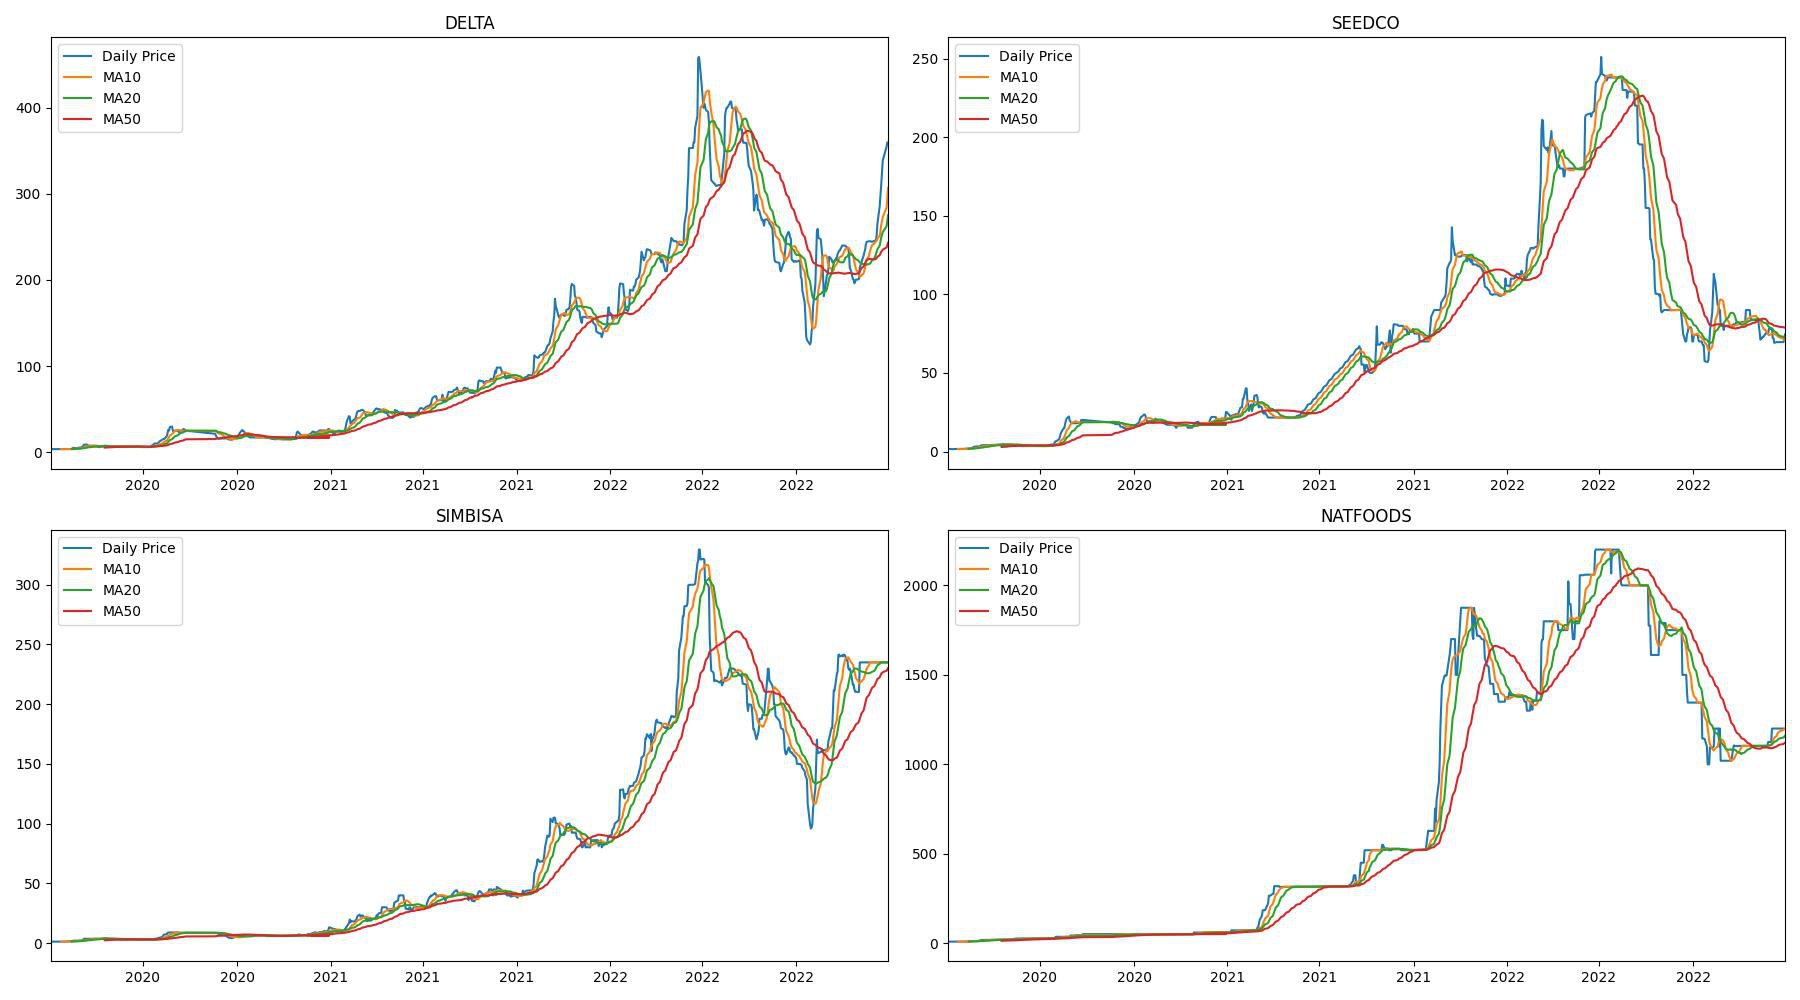

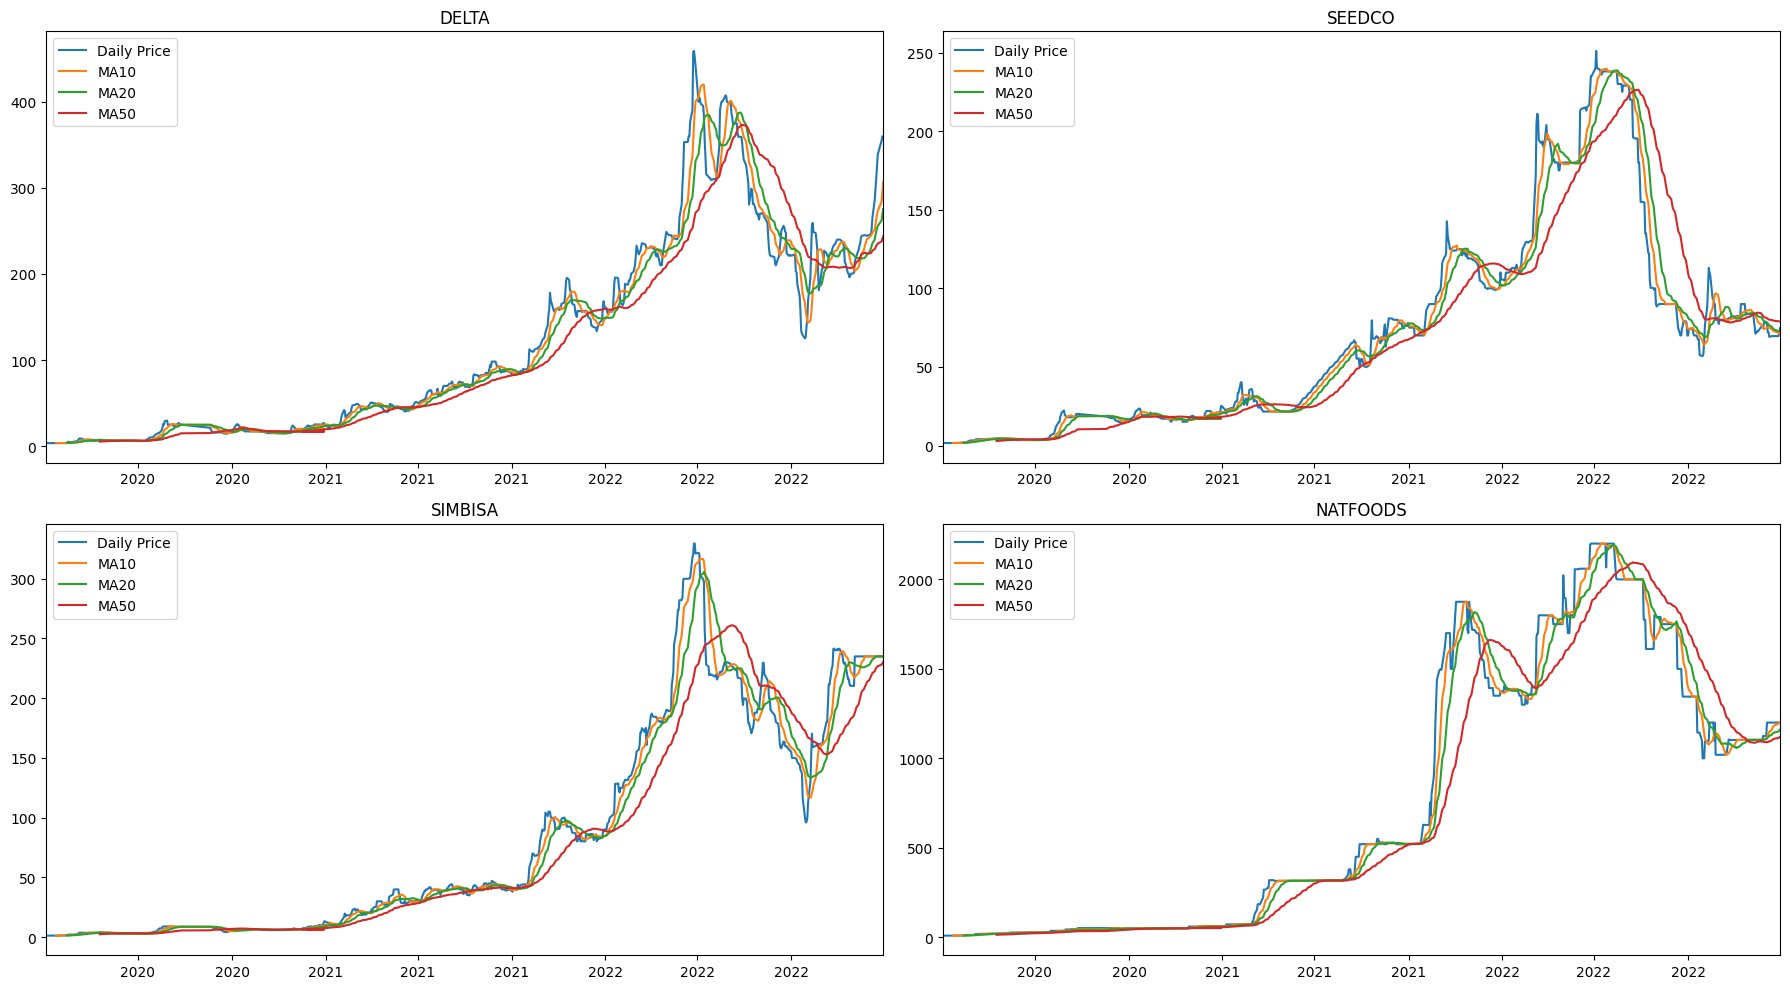

In [ ]:
print('\n Moving Averages of the Stocks')
import matplotlib.dates as mdates


stocks = list(zse.columns)

xmin = min([zse[stock].index.min() for stock in stocks])
xmax = max([zse[stock].index.max() for stock in stocks])

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axs = axs.ravel()

for i, stock in enumerate(stocks):
    axs[i].plot(zse[stock].index, zse[stock], label='Daily Price')

    # Calculate moving averages of 10, 20, and 50 days
    ma10 = zse[stock].rolling(window=10).mean()
    ma20 = zse[stock].rolling(window=20).mean()
    ma50 = zse[stock].rolling(window=50).mean()

    # Plot the moving averages
    axs[i].plot(zse[stock].index, ma10, label='MA10')
    axs[i].plot(zse[stock].index, ma20, label='MA20')
    axs[i].plot(zse[stock].index, ma50, label='MA50')

    axs[i].set_title(stock)
    axs[i].legend(loc='upper left')
    axs[i].set_xlim(xmin, xmax)
    axs[i].xaxis.set_major_formatter(mdates.AutoDateFormatter(mdates.AutoDateLocator()))


plt.tight_layout()

# Saving the plot as a JPEG image file
plt.savefig('MAs.jpg')

# Open the saved image file and display it
image = Image.open('MAs.jpg')
image.show()

## Data Exploration

Here we will look at
1. Distribution of the Daily returns prices
2. Stock Prices Correlation
3. Stock Returns Correlation
4. ScatterPlot


Stock Prices Distribution


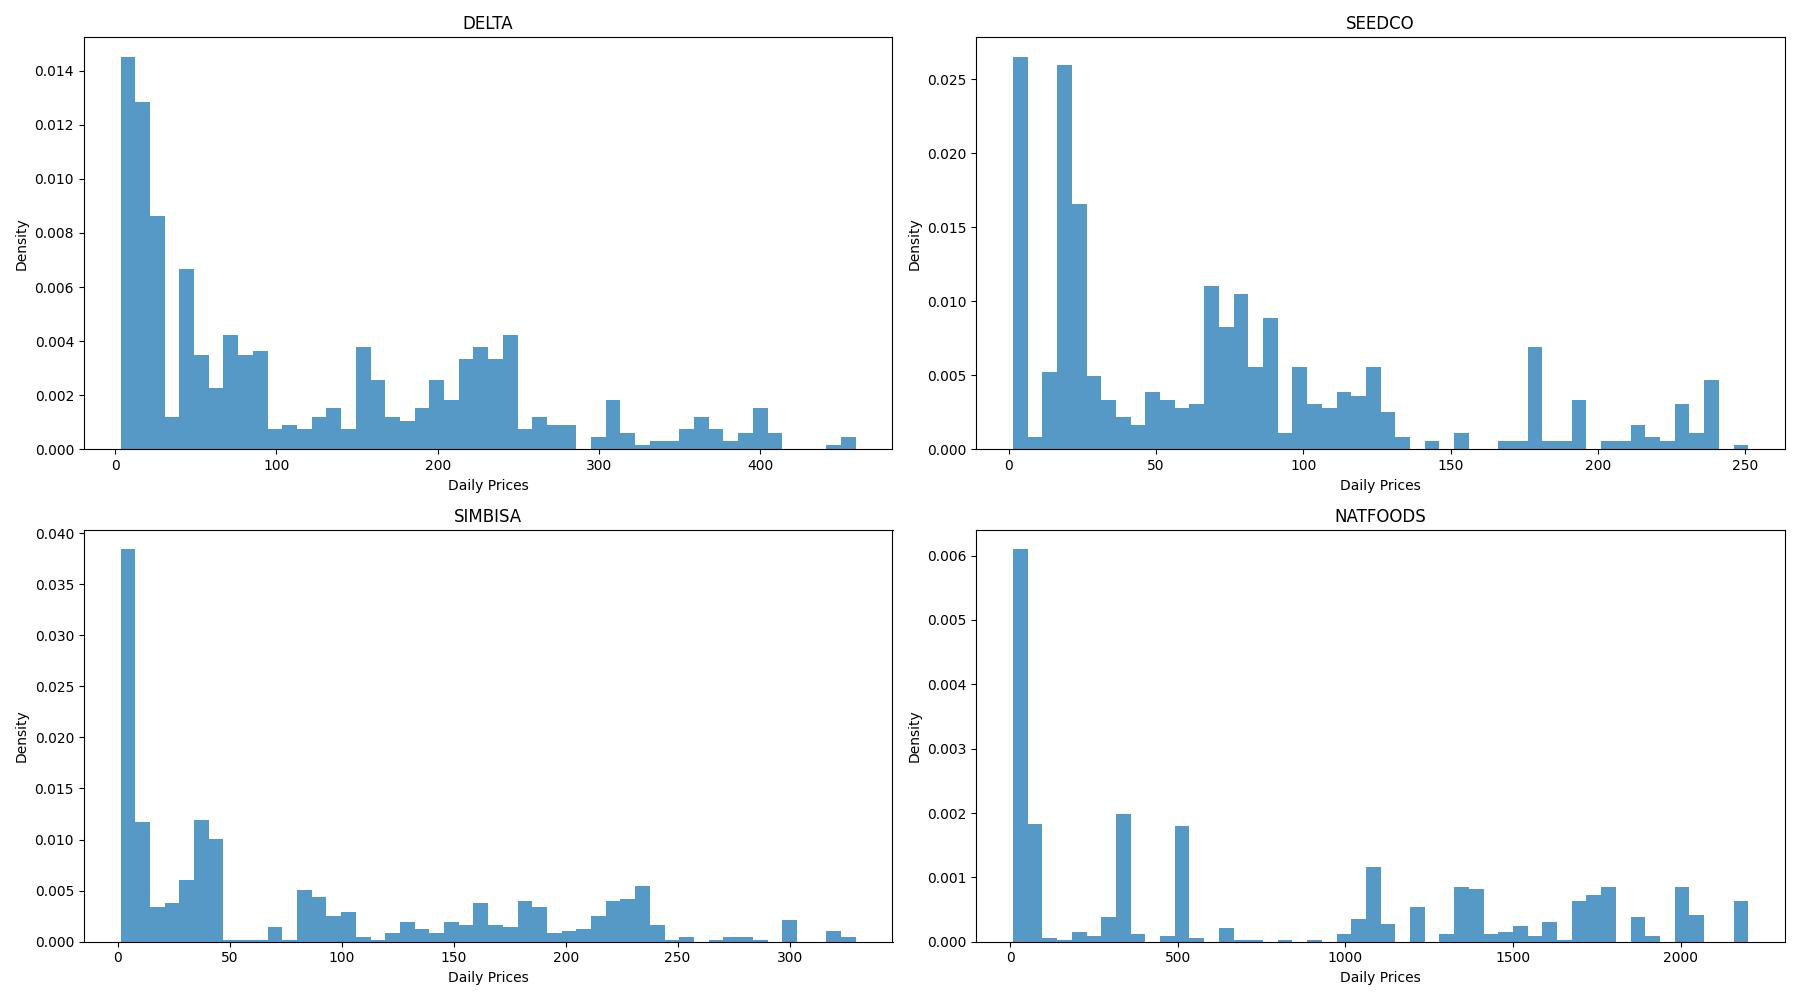

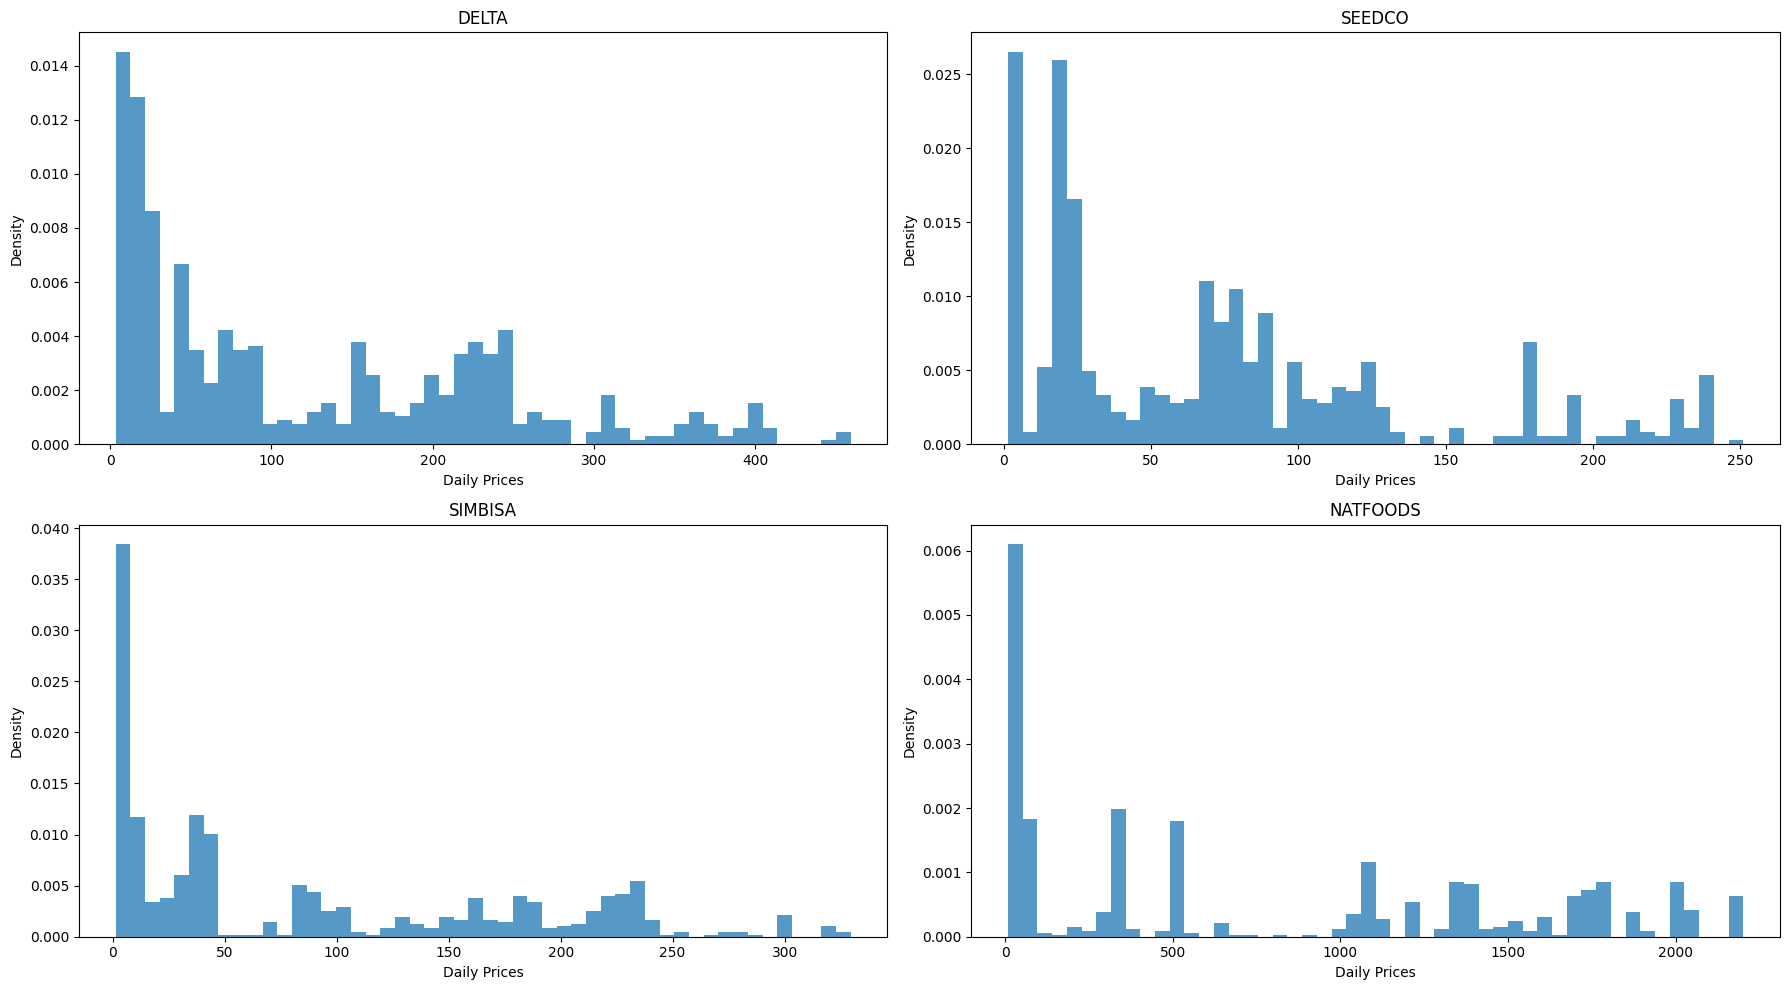

In [ ]:
print('\nStock Prices Distribution')

stocks = list(zse.columns)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axs = axs.ravel()

for i, stock in enumerate(stocks):
    daily_prices = zse[stock]
    daily_prices.dropna(inplace=True)

    axs[i].hist(daily_prices, bins=50, density=True, alpha=0.75)
    axs[i].set_title(stock)
    axs[i].set_xlabel('Daily Prices')
    axs[i].set_ylabel('Density')

plt.tight_layout()

# Saving the plot as a JPEG image file
plt.savefig('Prices_Dist.jpg')

# Open the saved image file and display it
image = Image.open('Prices_Dist.jpg')
image.show()


### Distribution of the Daily Returns


Stock Returns Distribution


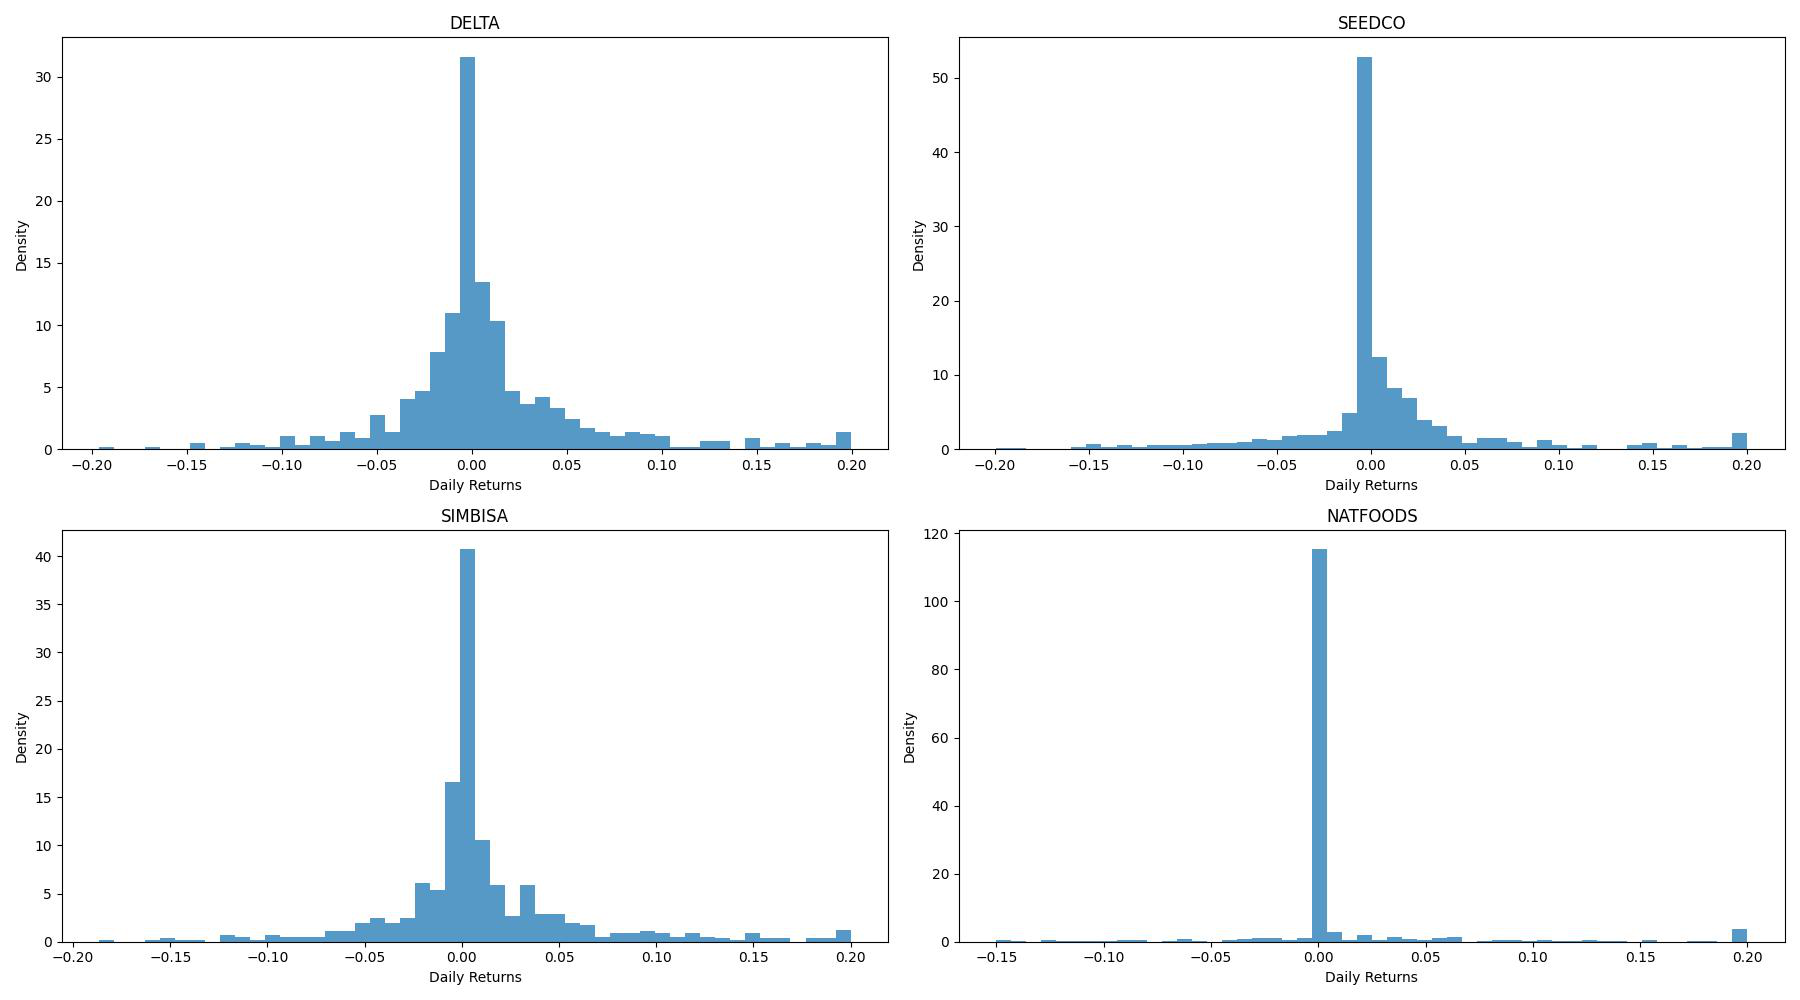

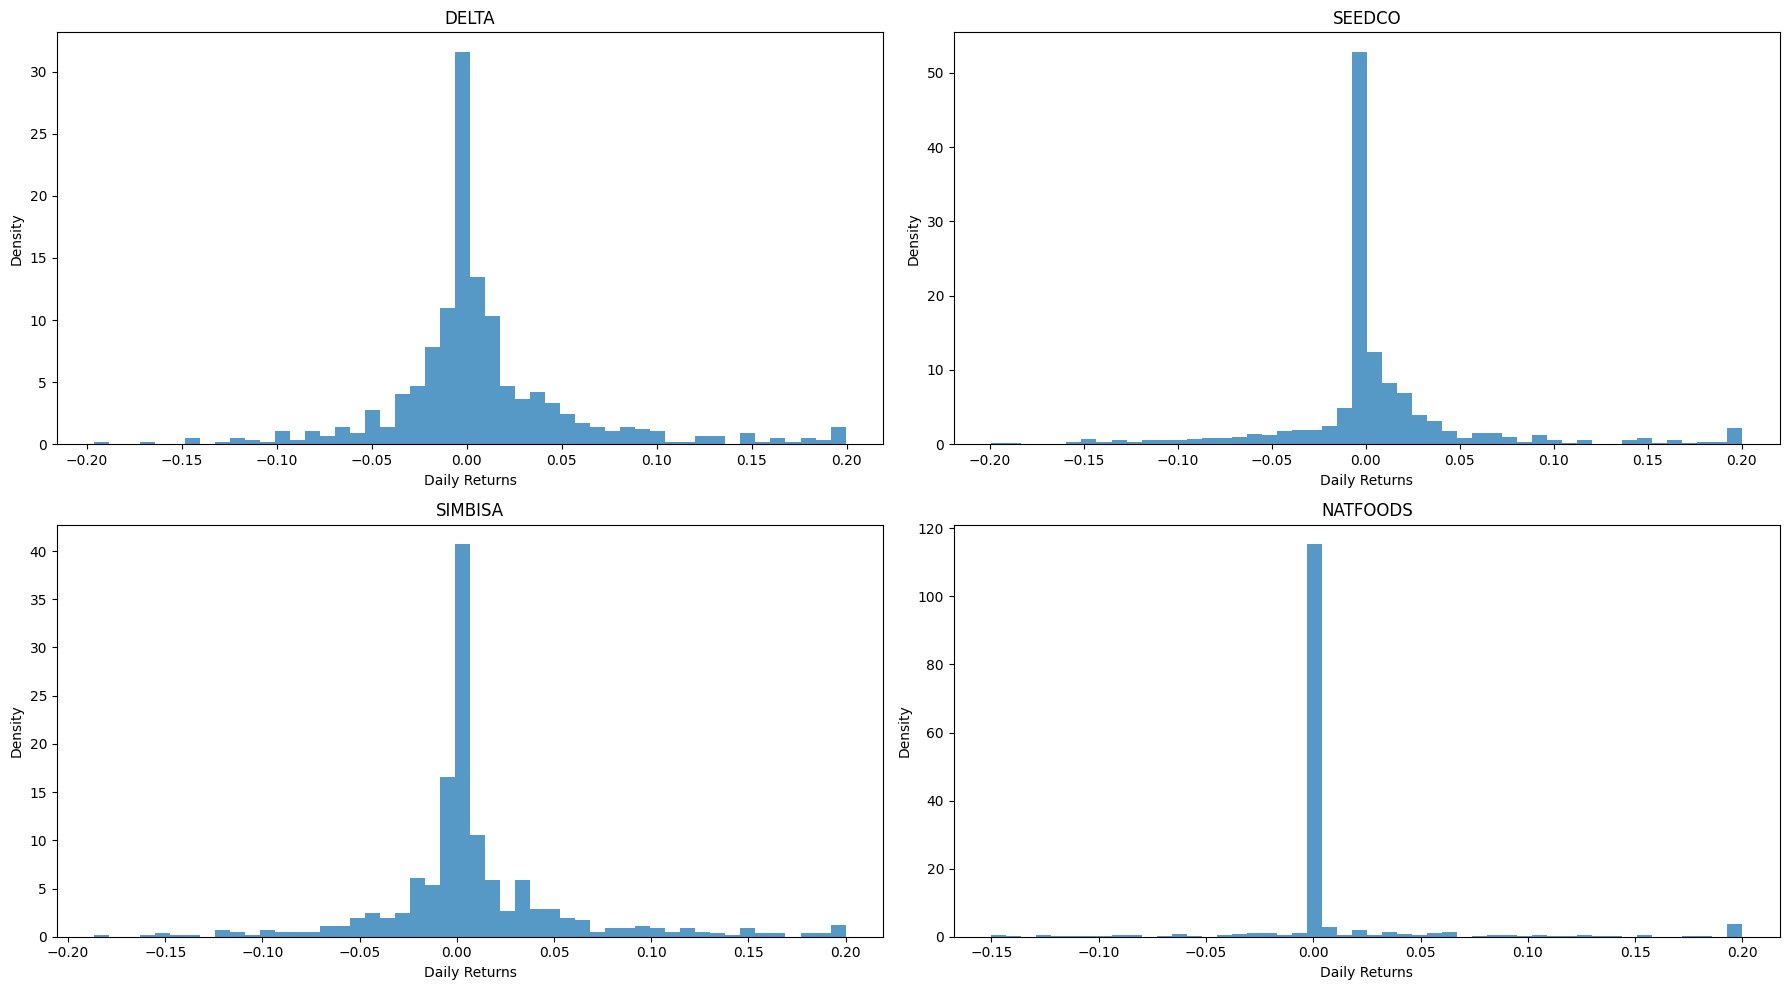

In [ ]:
print('\nStock Returns Distribution')

stocks = list(zse.columns)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axs = axs.ravel()

for i, stock in enumerate(stocks):
    daily_returns = zse[stock].pct_change()
    daily_returns.dropna(inplace=True)

    axs[i].hist(daily_returns, bins=50, density=True, alpha=0.75)
    axs[i].set_title(stock)
    axs[i].set_xlabel('Daily Returns')
    axs[i].set_ylabel('Density')

plt.tight_layout()

# Saving the plot as a JPEG image file
plt.savefig('Returns_Dist.jpg')

# Open the saved image file and display it
image = Image.open('Returns_Dist.jpg')
image.show()

This code calculates the daily returns for each stock using the pct_change() method, then drops any NaN values. It then creates a histogram of the daily returns using the hist() function, with 50 bins, a density normalization, and an alpha of 0.75 for transparency. The resulting plot shows the distribution of daily returns for each stock.

### Stock Prices Correlation Analysis


Stock Prices Correlation Analysis


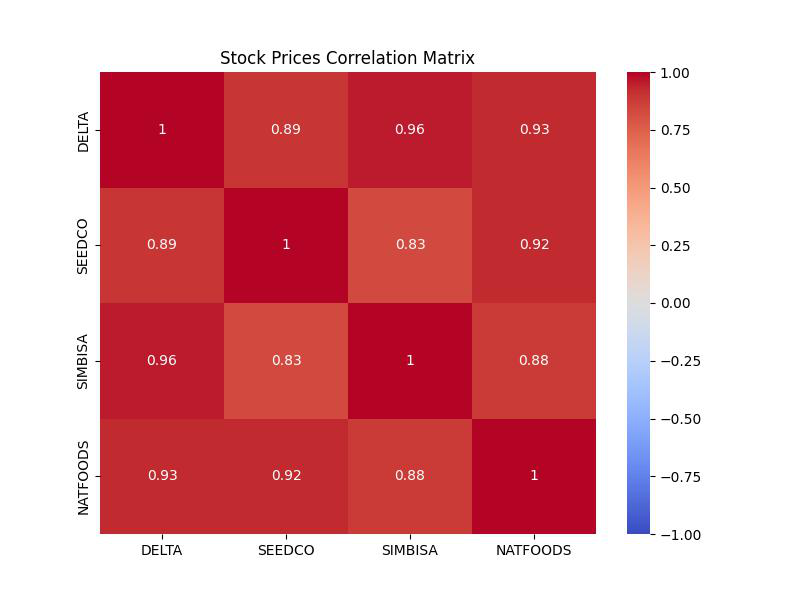

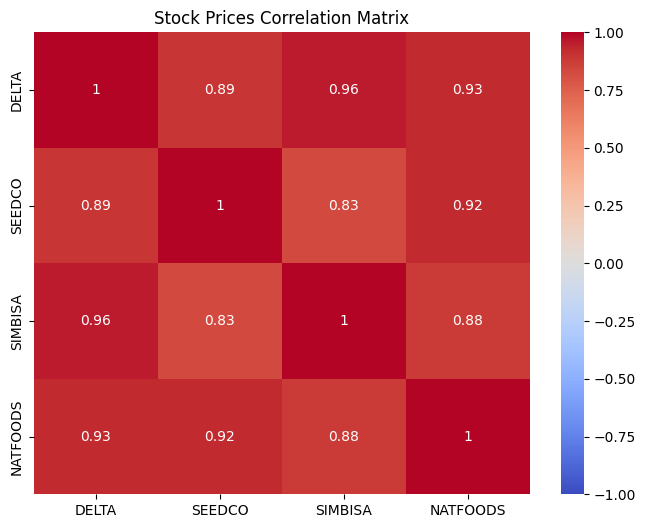

In [ ]:
print('\nStock Prices Correlation Analysis')

# Calculate daily returns for each stock
daily_prices = zse

# Calculate correlation matrix between daily returns
corr_matrix = daily_prices.corr()

# Plot heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
ax.set_title('Stock Prices Correlation Matrix')
#plt.show()

# Saving the plot as a JPEG image file
plt.savefig('Prices Corr.jpg')

# Open the saved image file and display it
image = Image.open('Prices Corr.jpg')
image.show()

### Returns Correlation Analysis


Stock Returns Correlation Analysis


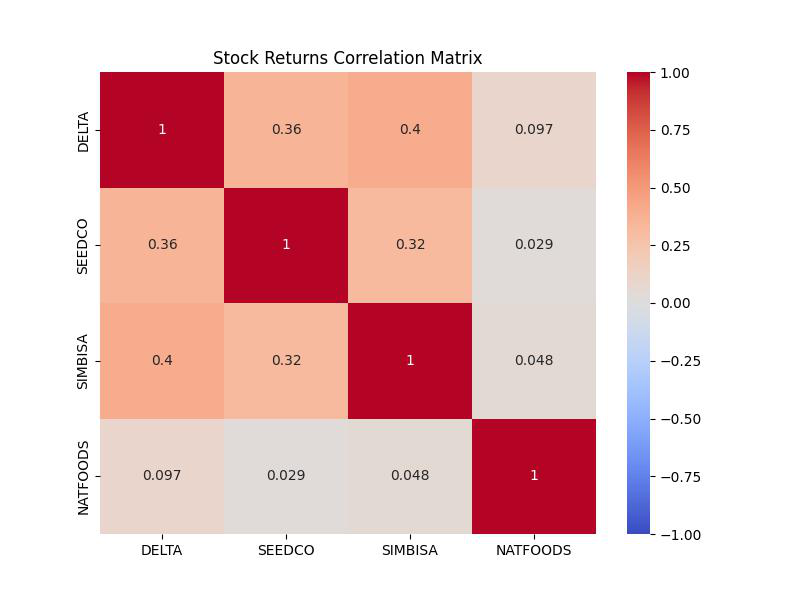

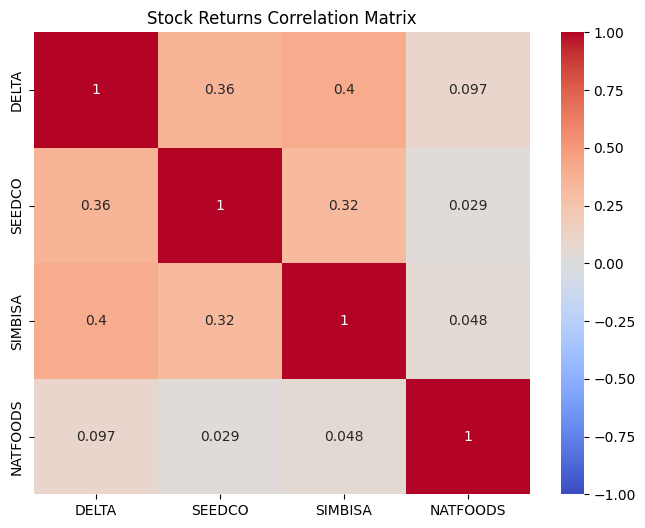

In [ ]:
print('\nStock Returns Correlation Analysis')

# Calculate daily returns for each stock
daily_returns = zse.pct_change().dropna()

# Calculate correlation matrix between daily returns
corr_matrix = daily_returns.corr()

# Plot heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
ax.set_title('Stock Returns Correlation Matrix')
#plt.show()

# Saving the plot as a JPEG image file
plt.savefig('Returns Corr.jpg')

# Open the saved image file and display it
image = Image.open('Returns Corr.jpg')
image.show()


This code first calculates the daily returns for each stock using the pct_change() function, and then drops any rows with missing values using the dropna() function. It then calculates the correlation matrix between the daily returns using the corr() function, and visualizes the matrix using a heatmap created with the seaborn library. The heatmap has annotations displaying the correlation coefficients, and uses the coolwarm colormap to show positive and negative correlations. The vmin and vmax arguments set the range of the color scale to be between -1 and 1, the minimum and maximum possible correlation coefficients.

### ScatterPlot


ScatterPlot


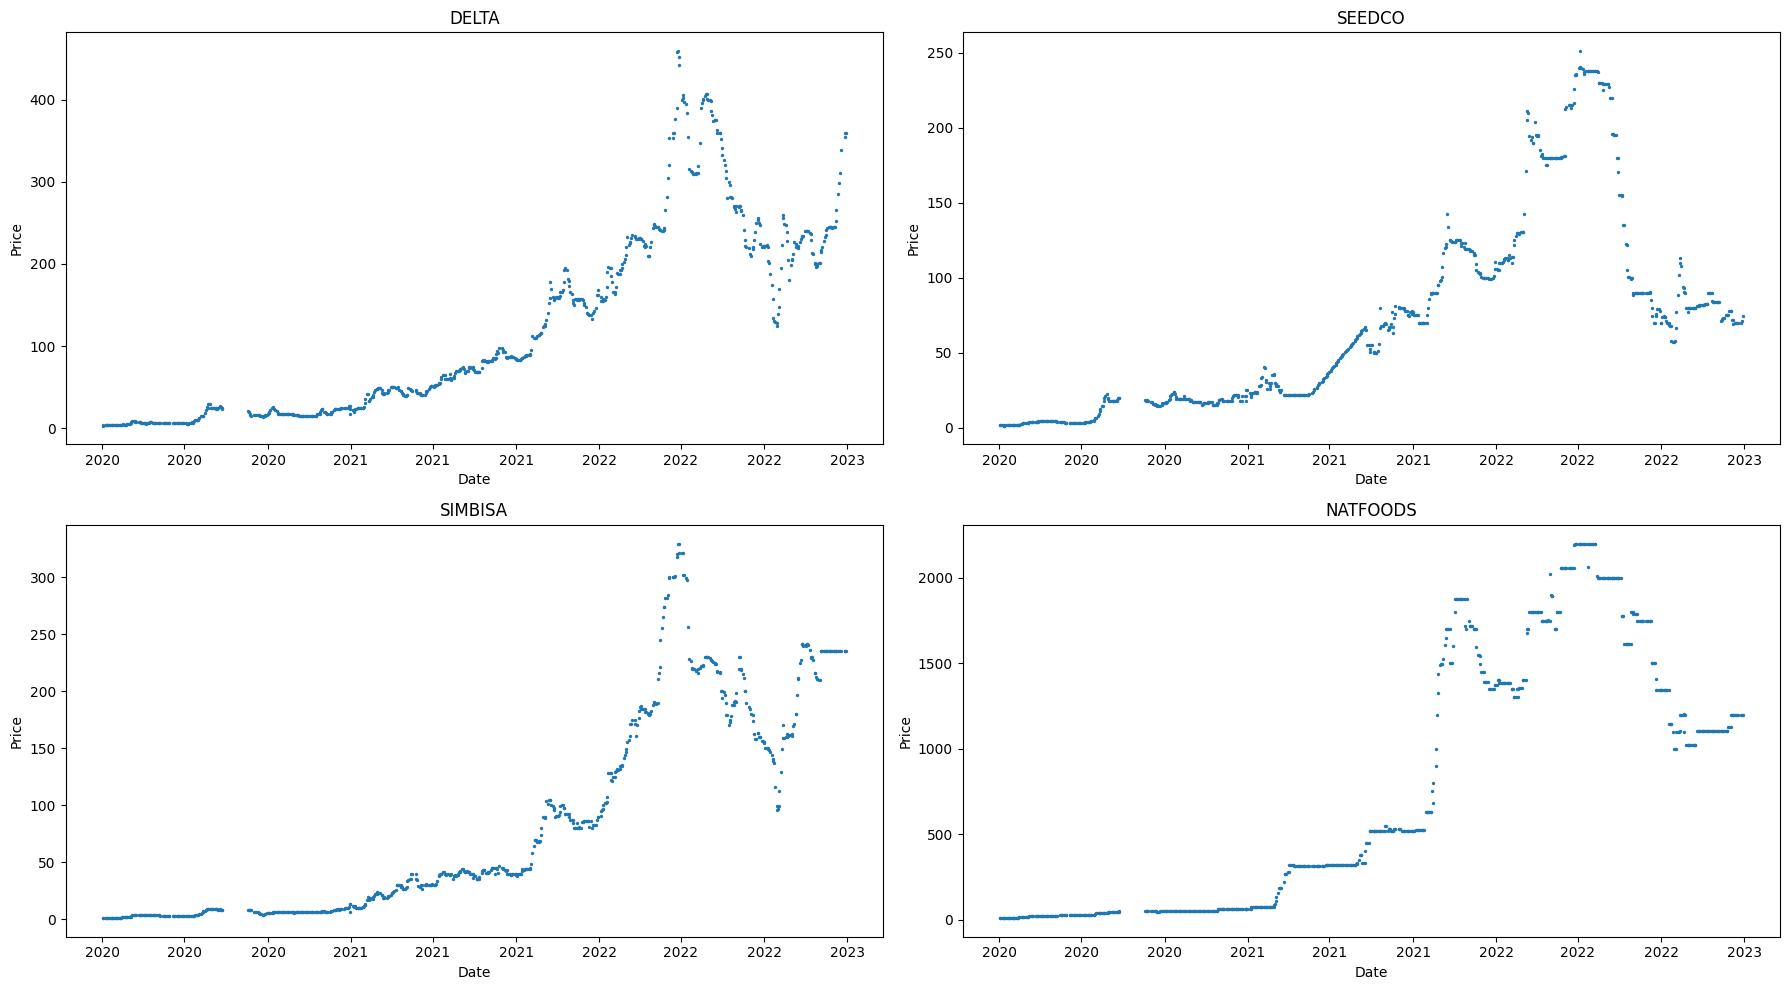

<Figure size 640x480 with 0 Axes>

In [ ]:
print('\nScatterPlot')
import matplotlib.dates as mdates

stocks = list(zse.columns)

xmin = min([zse[stock].index.min() for stock in stocks])
xmax = max([zse[stock].index.max() for stock in stocks])

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axs = axs.ravel()

for i, stock in enumerate(stocks):
    x = zse[stock].index
    y = zse[stock].values
    axs[i].scatter(x, y, s=2)
    axs[i].set_title(stock)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Price')
    axs[i].xaxis.set_major_formatter(mdates.AutoDateFormatter(mdates.AutoDateLocator()))

plt.tight_layout()
plt.show()
plt.savefig('scatterplot.png')

## Data Visualization

Here we will look at
1. Historical Price Evolution
2. Daily Return Evolution
3. Monthly Return Evolution
3. Seasonality

### Historical Price Evolution


Historical Stock Price Evolution


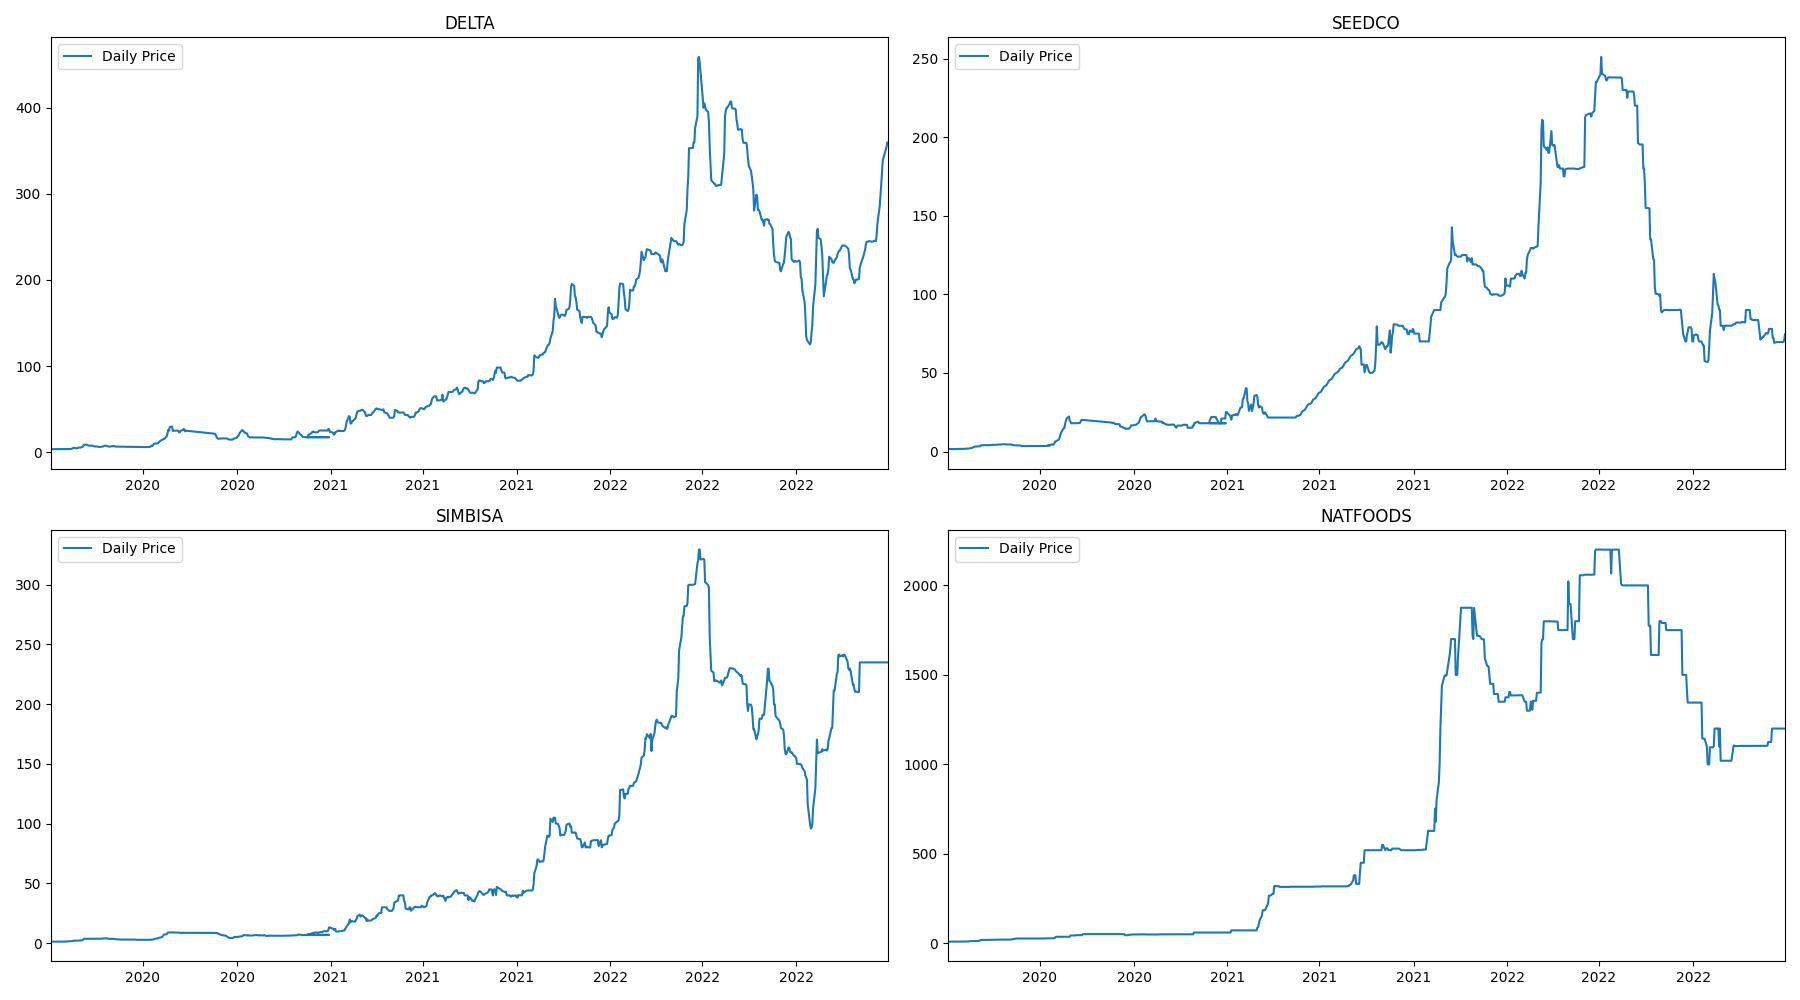

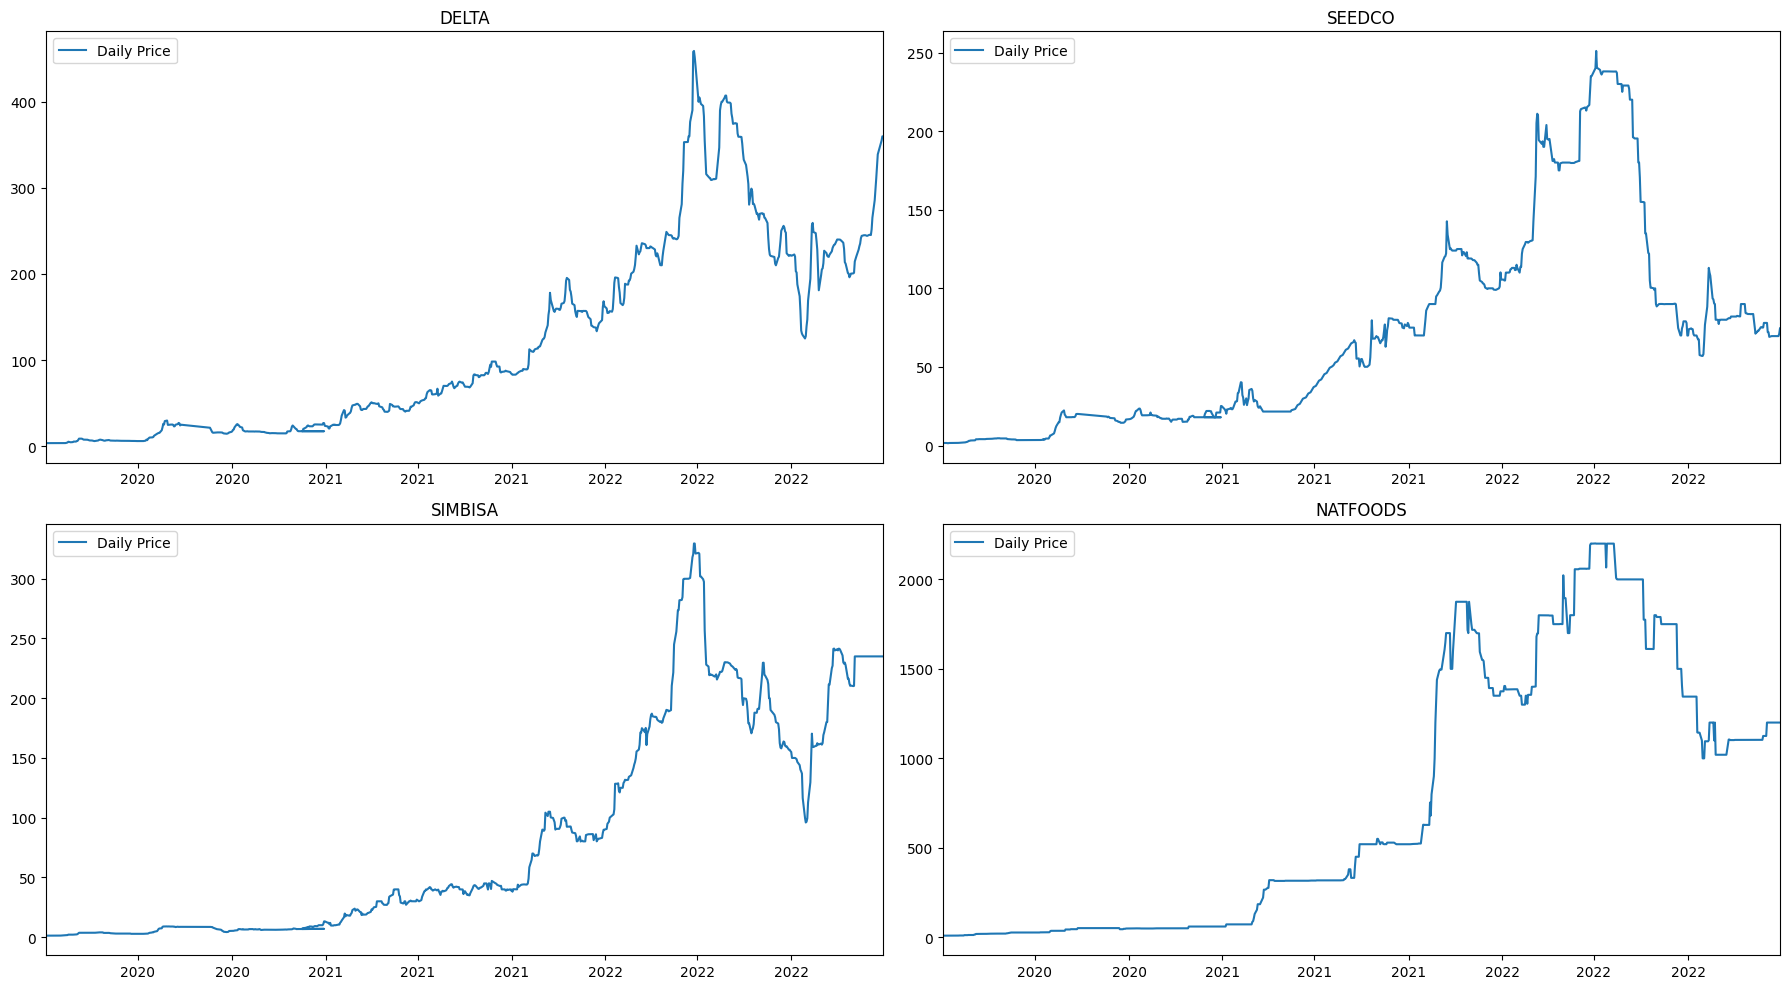

In [ ]:
print('\nHistorical Stock Price Evolution')
import matplotlib.dates as mdates


stocks = list(zse.columns)

xmin = min([zse[stock].index.min() for stock in stocks])
xmax = max([zse[stock].index.max() for stock in stocks])

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axs = axs.ravel()

for i, stock in enumerate(stocks):
    axs[i].plot(zse[stock].index, zse[stock], label='Daily Price')
    axs[i].set_title(stock)
    axs[i].legend(loc='upper left')
    axs[i].set_xlim(xmin, xmax)
    axs[i].xaxis.set_major_formatter(mdates.AutoDateFormatter(mdates.AutoDateLocator()))


plt.tight_layout()

# Saving the plot as a JPEG image file
plt.savefig('Price Evolution.jpg')

# Open the saved image file and display it
image = Image.open('Price Evolution.jpg')
image.show()

### Daily Returns Evolution


Historical Stock Price Returns


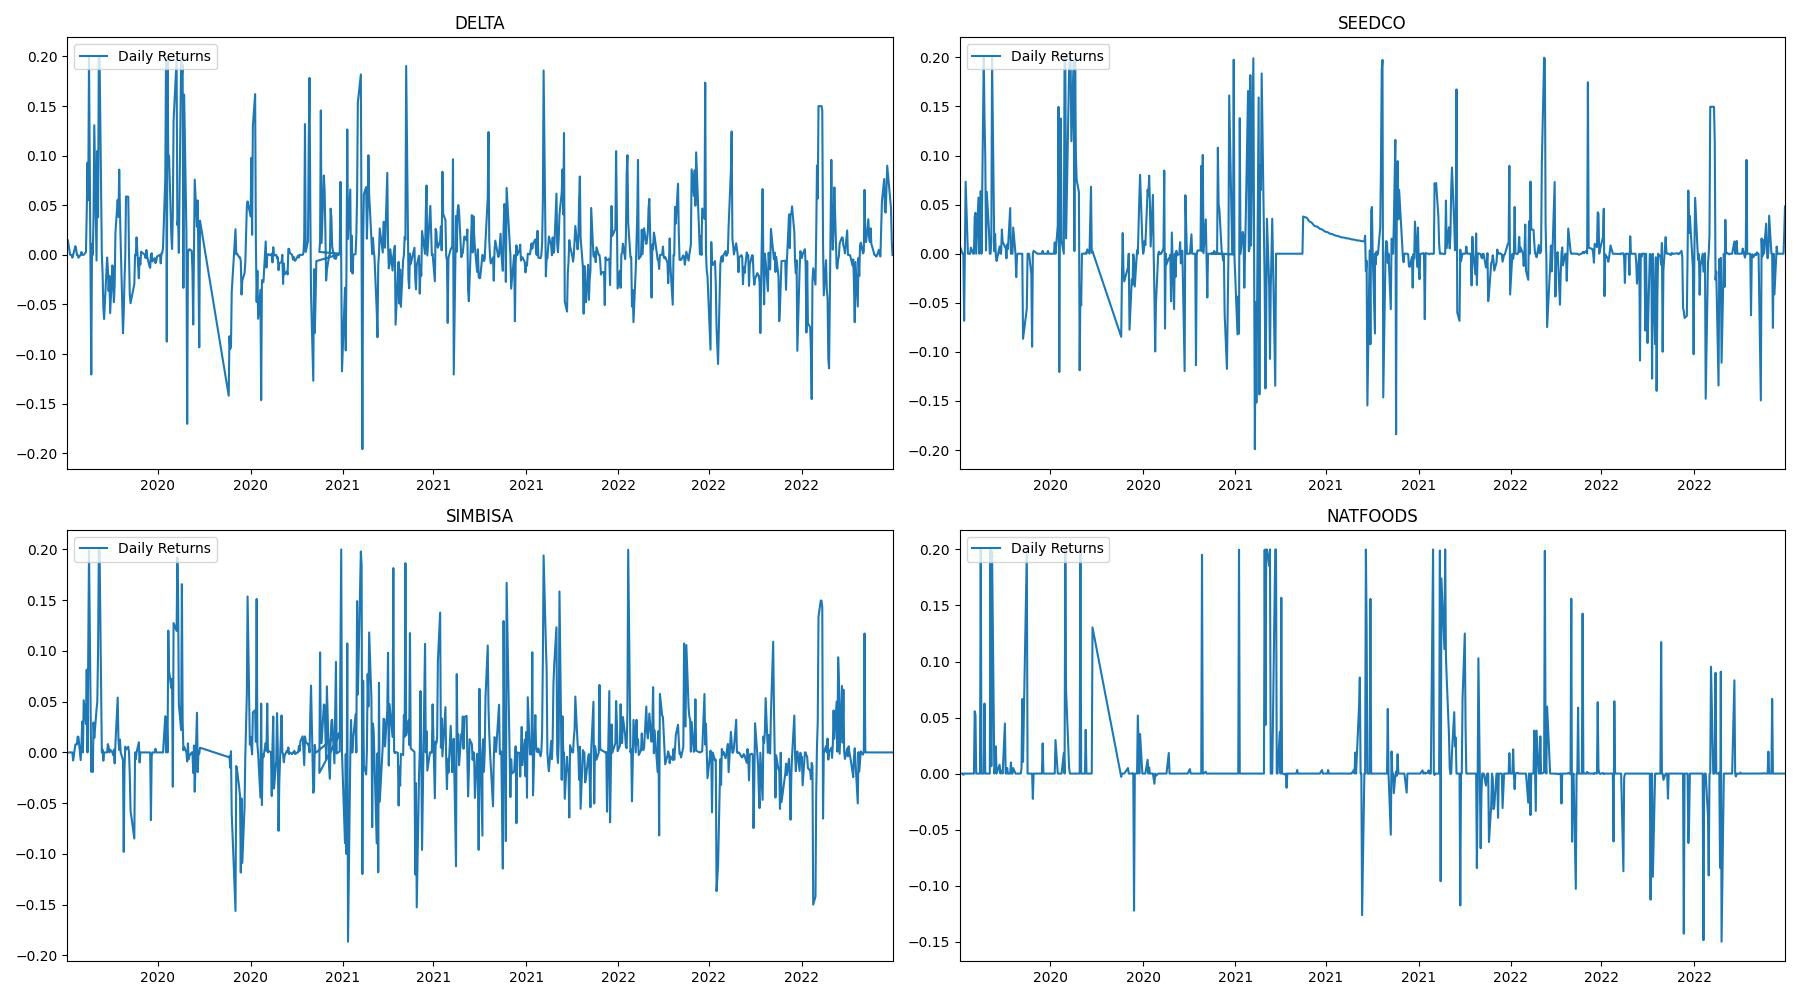

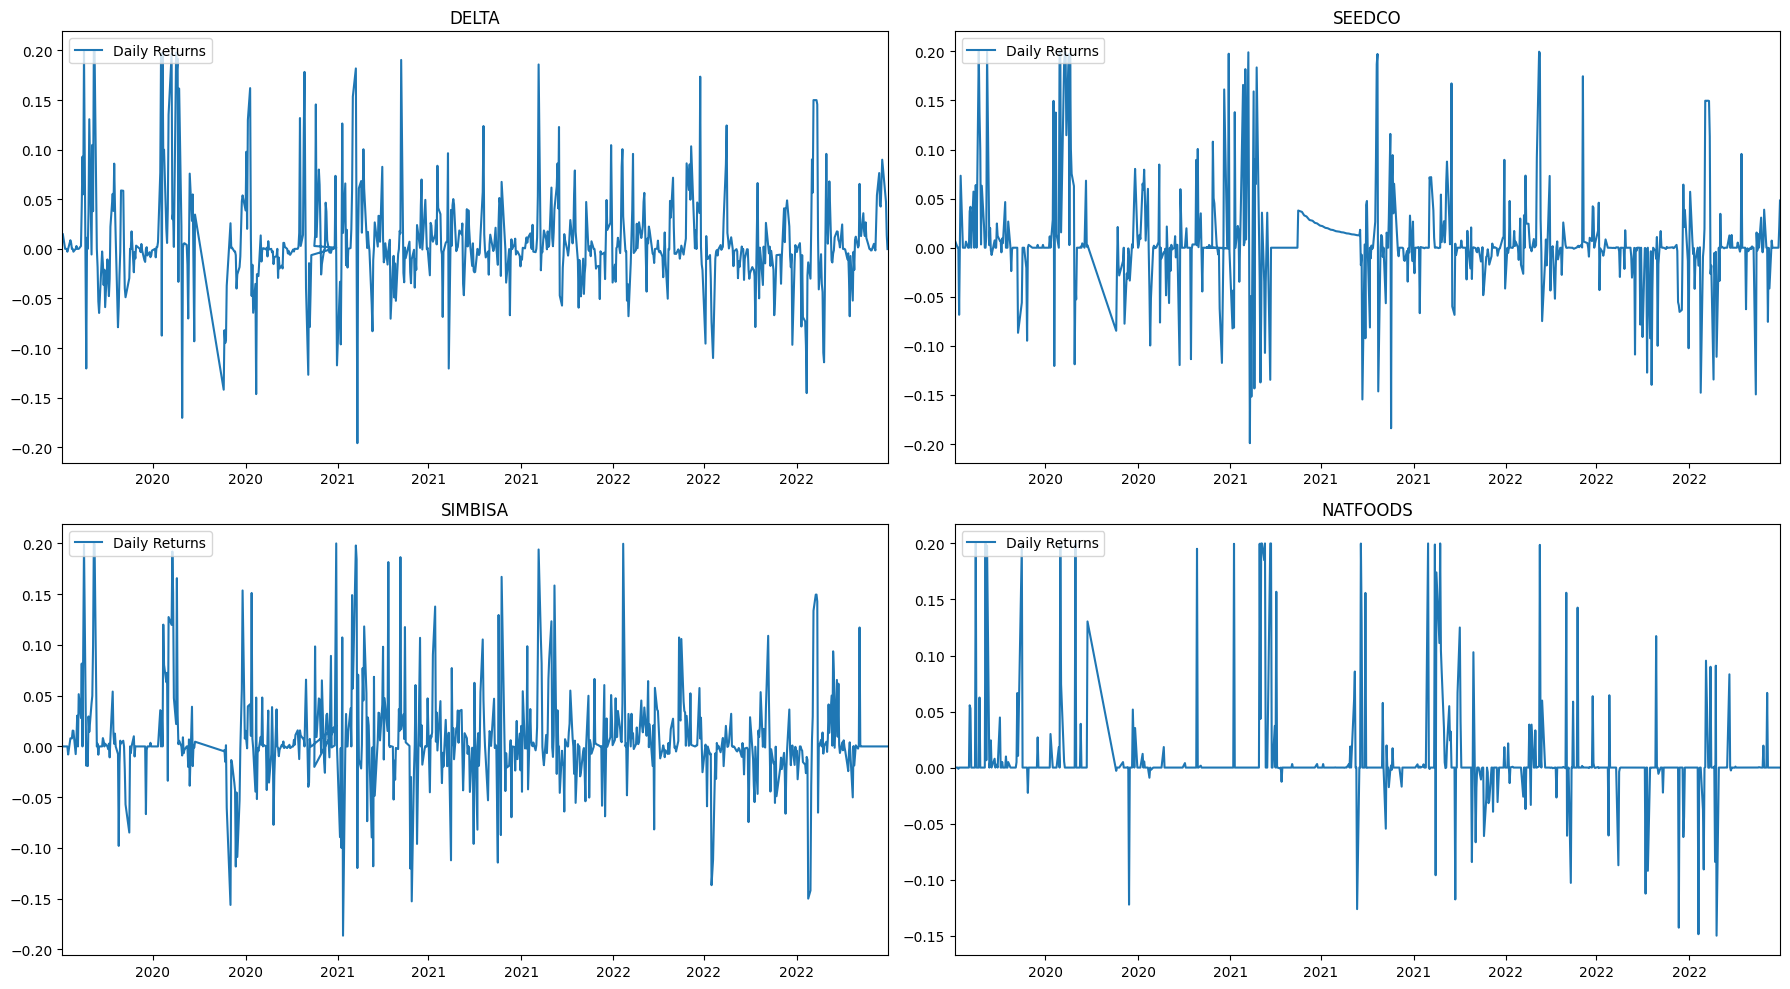

In [ ]:
print('\nHistorical Stock Price Returns')
import matplotlib.dates as mdates


stocks = list(zse.columns)

xmin = min([zse[stock].index.min() for stock in stocks])
xmax = max([zse[stock].index.max() for stock in stocks])

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axs = axs.ravel()

for i, stock in enumerate(stocks):
    daily_returns = zse[stock].pct_change()
    daily_returns.dropna(inplace=True)
    axs[i].plot(daily_returns.index, daily_returns, label='Daily Returns')
    axs[i].set_title(stock)
    axs[i].legend(loc='upper left')
    axs[i].set_xlim(xmin, xmax)
    axs[i].xaxis.set_major_formatter(mdates.AutoDateFormatter(mdates.AutoDateLocator()))

plt.tight_layout()

# Saving the plot as a JPEG image file
plt.savefig('Stock Returns.jpg')

# Open the saved image file and display it
image = Image.open('Stock Returns.jpg')
image.show()


### Monthly Returns Evolution


Monthly Historical Stock Returns


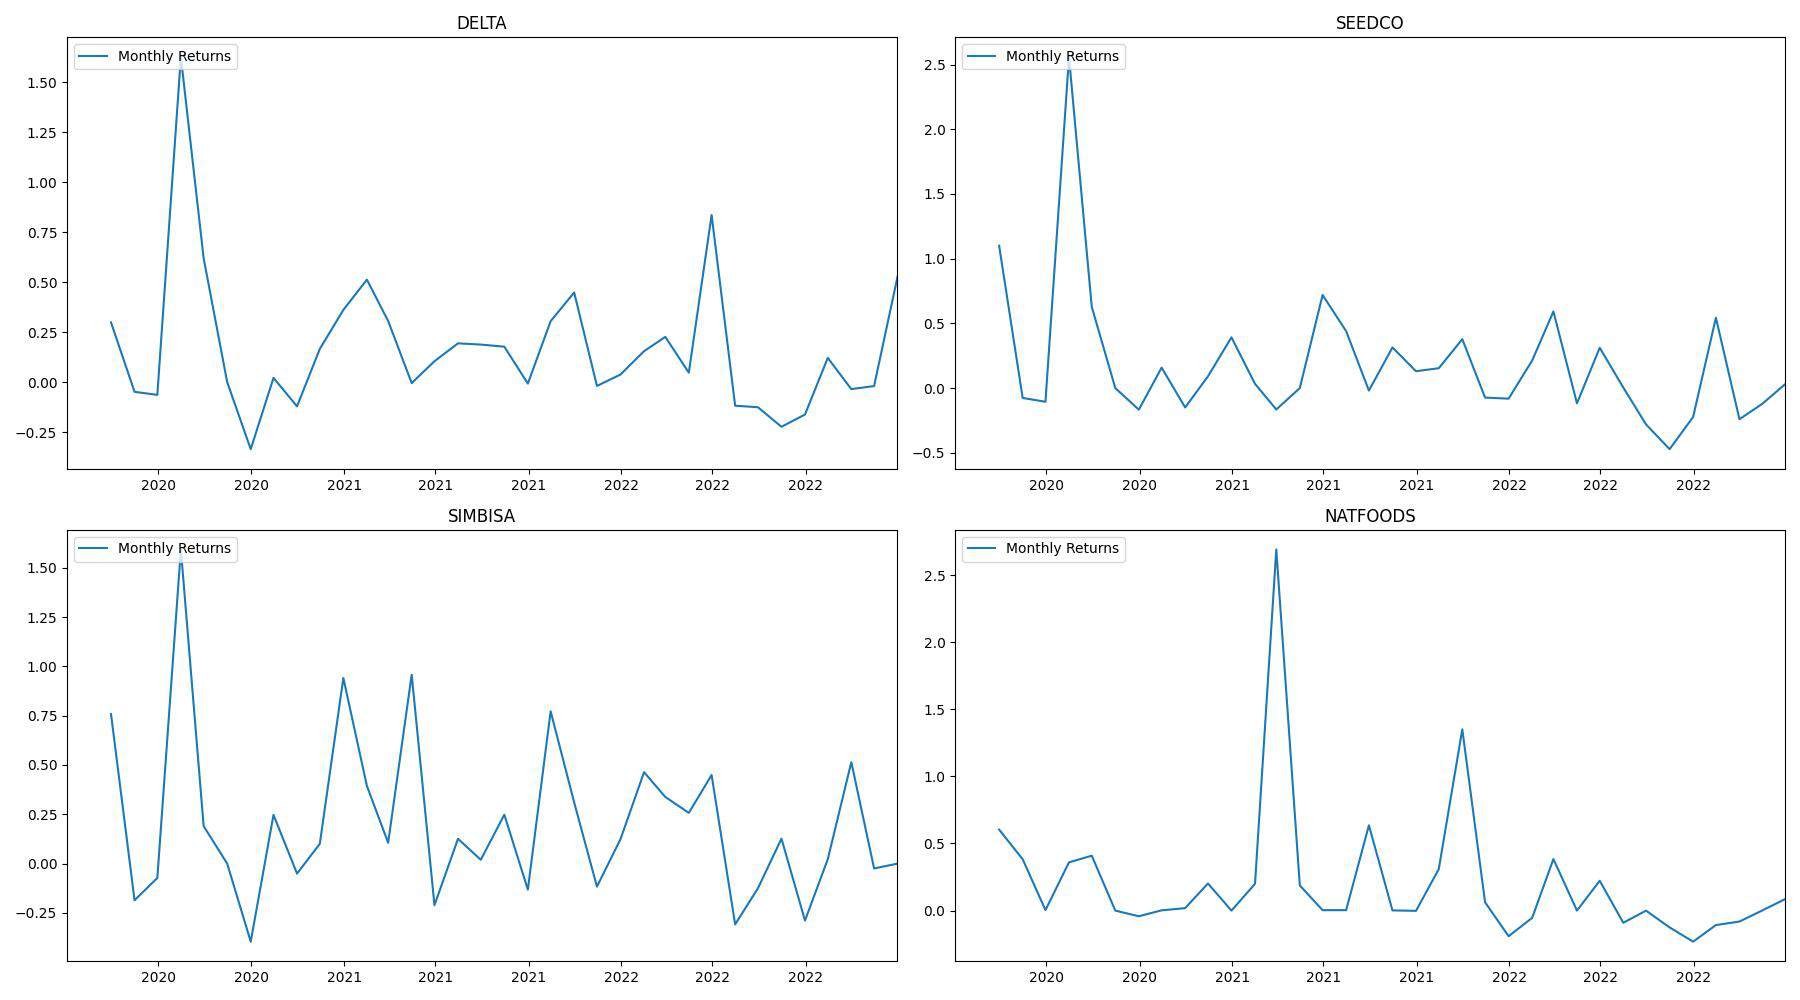

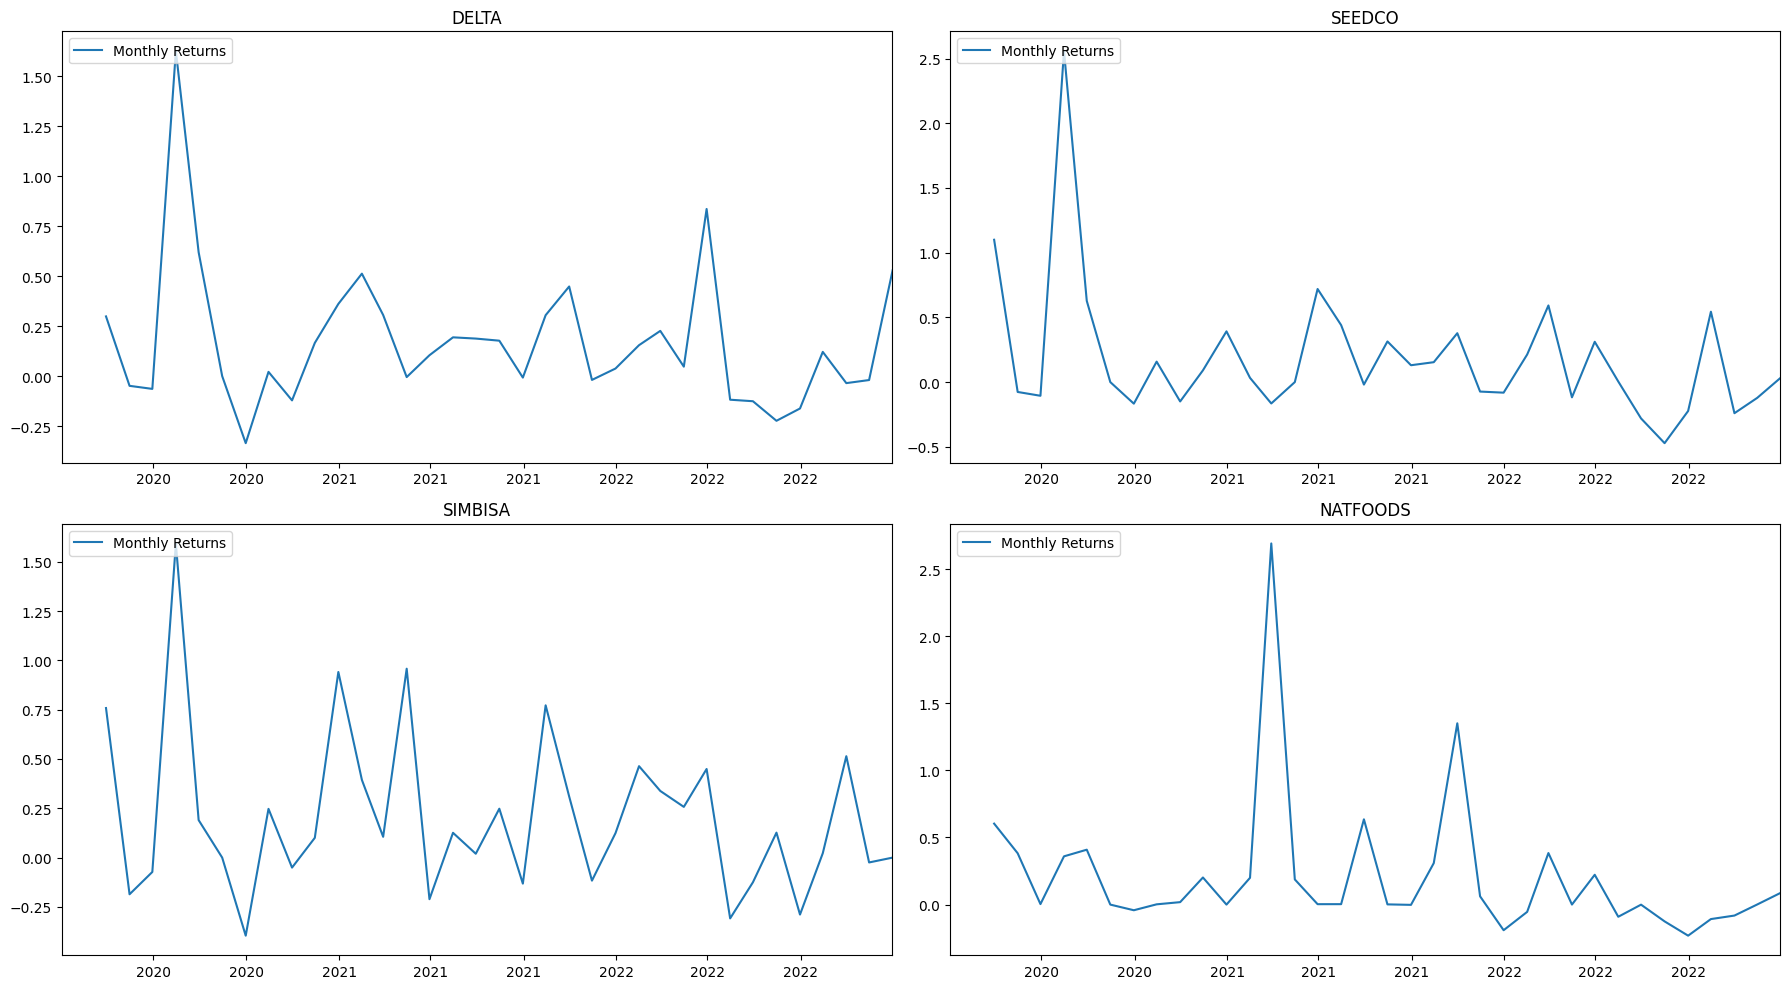

In [ ]:
print('\nMonthly Historical Stock Returns')
#import matplotlib.dates as mdates


stocks = list(zse.columns)

xmin = min([zse[stock].index.min() for stock in stocks])
xmax = max([zse[stock].index.max() for stock in stocks])

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axs = axs.ravel()

for i, stock in enumerate(stocks):
    monthly_returns = zse[stock].resample('M').last().pct_change()
    monthly_returns.dropna(inplace=True)
    axs[i].plot(monthly_returns.index, monthly_returns, label='Monthly Returns')
    axs[i].set_title(stock)
    axs[i].legend(loc='upper left')
    axs[i].set_xlim(xmin, xmax)
    axs[i].xaxis.set_major_formatter(mdates.AutoDateFormatter(mdates.AutoDateLocator()))

plt.tight_layout()

# Saving the plot as a JPEG image file
plt.savefig('Monthly Stock Returns.jpg')

# Open the saved image file and display it
image = Image.open('Monthly Stock Returns.jpg')
image.show()


In this code, the resample method is used to resample the daily data to monthly data using the last method to get the last observation in each month. The pct_change method is then used to calculate the monthly returns from the resampled data.

The plot is then created using the monthly returns instead of the daily returns, and the plot is saved as a JPEG image file with the name Monthly Stock Returns.jpg

### Trend and Seasonality

In [ ]:
from pylab import rcParams
import statsmodels.api as sm

### DELTA

In [ ]:
# Now, for decomposition...

rcParams['figure.figsize'] = 11, 9
decomposed_delta_volume = sm.tsa.seasonal_decompose(zse['DELTA'],freq=252) # The frequncy is annual trading days
figure = decomposed_delta_volume.plot()

# Saving the plot as a JPEG image file
plt.savefig('DELTA - Seasonality.jpg')

# Open the saved image file and display it
image = Image.open('DELTA - Seasonality.jpg')
image.show()

TypeError: ignored

### SEEDCO

In [ ]:
# Now, for decomposition...

rcParams['figure.figsize'] = 11, 9
decomposed_seedco_volume = sm.tsa.seasonal_decompose(zse['SEEDCO'],freq=252) # The frequncy is annual trading days
figure = decomposed_seedco_volume.plot()

# Saving the plot as a JPEG image file
plt.savefig('SEEDCO - Seasonality.jpg')

# Open the saved image file and display it
image = Image.open('SEEDCO - Seasonality.jpg')
image.show()

### SIMBISA

In [ ]:
# Now, for decomposition...

rcParams['figure.figsize'] = 11, 9
decomposed_simbisa_volume = sm.tsa.seasonal_decompose(zse['SIMBISA'],freq=252) # The frequncy is annual trading days
figure = decomposed_simbisa_volume.plot()

# Saving the plot as a JPEG image file
plt.savefig('SIMBISA - Seasonality.jpg')

# Open the saved image file and display it
image = Image.open('SIMBISA - Seasonality.jpg')
image.show()

### NATFOODS

In [ ]:
# Now, for decomposition...

rcParams['figure.figsize'] = 11, 9
decomposed_natfoods_volume = sm.tsa.seasonal_decompose(zse['NATFOODS'],freq=252) # The frequncy is annual trading days
figure = decomposed_natfoods_volume.plot()

# Saving the plot as a JPEG image file
plt.savefig('NATFOODS - Seasonality.jpg')

# Open the saved image file and display it
image = Image.open('NATFOODS - Seasonality.jpg')
image.show()